In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-data-from-2010-to-2020/TSLA.csv


# Importe CSV

In [2]:
dataframe = pd.read_csv('../input/tesla-stock-data-from-2010-to-2020/TSLA.csv')
df = dataframe

# Estudio de los datos

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df["Date"] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [6]:
stock = df.set_index('Date')
stock.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


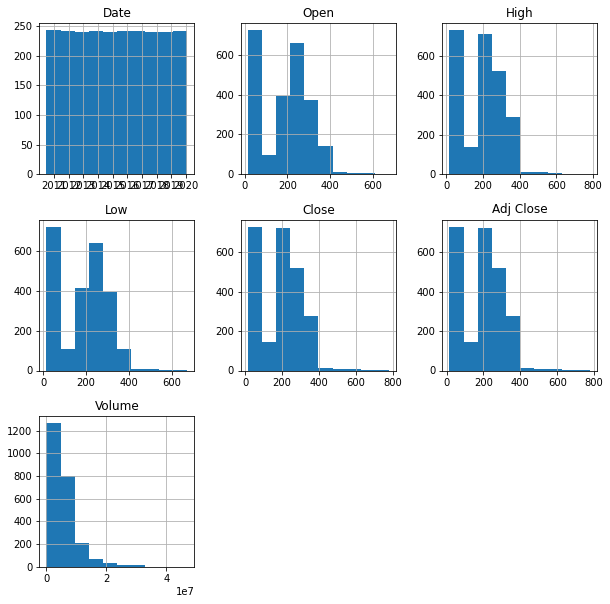

In [8]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

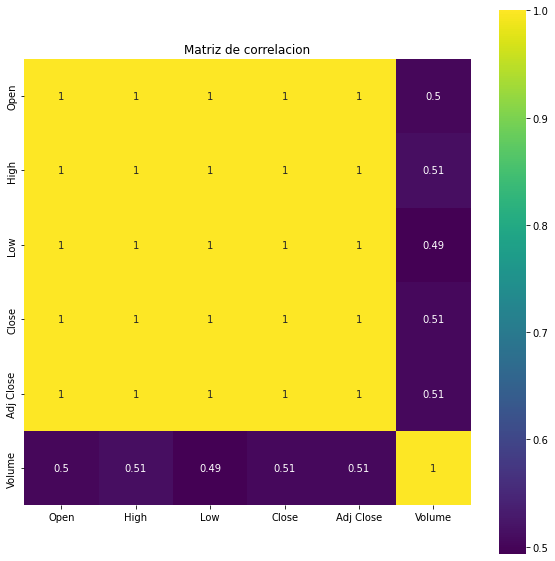

In [9]:
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

In [10]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Analisis

In [11]:
stock['Years'] = pd.DatetimeIndex(stock.index).year
stock['Months'] = pd.DatetimeIndex(stock.index).month
stock.head(100)

,Open,High,Low,Close,Adj Close,Volume,Years,Months
Date,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7
...,...,...,...,...,...,...,...,...
2010-11-11,28.600000,29.100000,27.330000,28.040001,28.040001,1945300,2010,11
2010-11-12,28.250000,30.500000,28.070000,29.840000,29.840000,2729100,2010,11
2010-11-15,30.219999,32.939999,30.219999,30.799999,30.799999,2622900,2010,11


<AxesSubplot:xlabel='Years', ylabel='Close'>

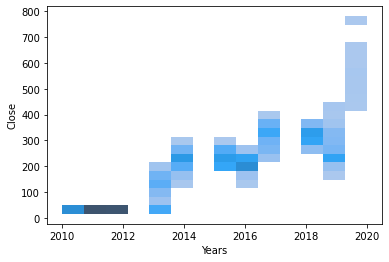

In [12]:
sns.histplot(x = stock['Years'], y = stock['Close'],)

In [13]:
MostExpensive = stock[stock['Years'] == 2019]
MostExpensive

,Open,High,Low,Close,Adj Close,Volume,Years,Months
Date,,,,,,,,
2019-01-02,306.100006,315.130005,298.799988,310.119995,310.119995,11658600,2019,1
2019-01-03,307.000000,309.399994,297.380005,300.359985,300.359985,6965200,2019,1
2019-01-04,306.000000,318.000000,302.730011,317.690002,317.690002,7394100,2019,1
2019-01-07,321.720001,336.739990,317.750000,334.959991,334.959991,7551200,2019,1
2019-01-08,341.959991,344.010010,327.019989,335.350006,335.350006,7008500,2019,1
...,...,...,...,...,...,...,...,...
2019-12-24,418.359985,425.470001,412.690002,425.250000,425.250000,8054700,2019,12
2019-12-26,427.910004,433.480011,426.350006,430.940002,430.940002,10633900,2019,12
2019-12-27,435.000000,435.309998,426.109985,430.380005,430.380005,9945700,2019,12


<AxesSubplot:xlabel='Months', ylabel='Close'>

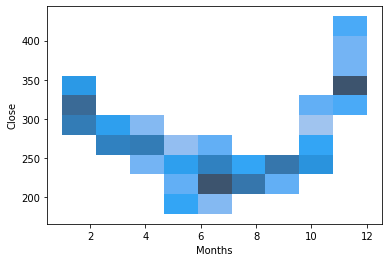

In [14]:
sns.histplot(x = MostExpensive['Months'], y = MostExpensive['Close'],)

# Preprocesamiento

In [15]:
df.drop(columns = ["Volume", 'Date'], inplace = True)

In [16]:
df.shape

(2416, 5)

In [17]:
array = df.values
X = array[:, 0:4]
Y = array[:, 4]

In [18]:
from sklearn.preprocessing import StandardScaler

sta = StandardScaler()
rescaledX = sta.fit_transform(X)

X_reg = rescaledX
Y_reg = Y


# Modelado

In [19]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score


models = []
models.append(('ElN', ElasticNet()))
models.append(('LS', Lasso()))
models.append(('LR', LinearRegression()))
models.append(('RiG', Ridge()))
models.append(('KR', KNeighborsRegressor()))
models.append(('SVR',  SVR()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10)
    result =  cross_val_score(model, X_reg, Y_reg,  cv=kfold)
    results.append(result)
    names.append(name)
    print(f"{name}: {result.mean()*100.0:,.2f} ({result.std()*100.0:,.2f})")

ElN: -622.75 (1,313.38)
LS: 96.28 (5.98)
LR: 100.00 (0.00)
RiG: 99.85 (0.11)
KR: 92.43 (10.54)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.318e+03, tolerance: 2.721e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.423e+03, tolerance: 2.766e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

SVR: 32.87 (108.19)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.80 )
svc = LinearRegression()
svc.fit(X_train, y_train)
predicted = svc.predict(X_test)
score =r2_score(y_test, predicted)
print(f"Score: {score}")

Score: 1.0


# Prediccion 

In [21]:
print(predicted)

[308.899994 232.559998 296.73999  ...  24.950001 222.600006 325.829987]


In [22]:
df2 = pd.DataFrame({'Predicted': predicted})
df2.head(20)

,Predicted
0,308.899994
1,232.559998
2,296.739990
3,18.320000
4,152.460007
5,307.190002
6,310.549988
7,351.559998
8,206.660004
9,208.720001


<AxesSubplot:ylabel='Predicted'>

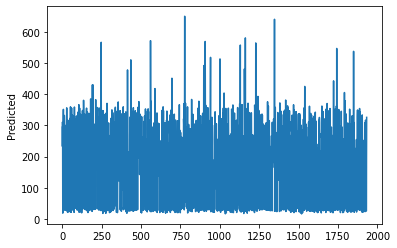

In [23]:
sns.lineplot(data=df2['Predicted'])